In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

## Import and compare different panels

In [3]:
user_all = []
for panel_name in ['A', 'B', 'C']:
    user_data = pd.read_excel('user-type-annotations/random_sample_users_panel{}_annotated_FMH.xlsx'.format(panel_name), index_col=0)
    user_all.append(user_data)

user_all = pd.concat(user_all)

In [29]:
user_vc = user_all.groupby('panel')['user type'].value_counts().unstack().transpose()
user_vc['total_share'] = 100 * user_vc.sum(axis=1) / user_vc.sum().sum()
user_vc

panel,A,B,C,total_share
user type,,,,
business,26,21,26,24.333333
journalism,14,12,16,14.000000
ngo,5,19,15,13.000000
other,1,3,2,2.000000
policy,2,3,6,3.666667
private,14,17,4,11.666667
science,8,12,17,12.333333
unclear,30,13,14,19.000000


<AxesSubplot:xlabel='panel'>

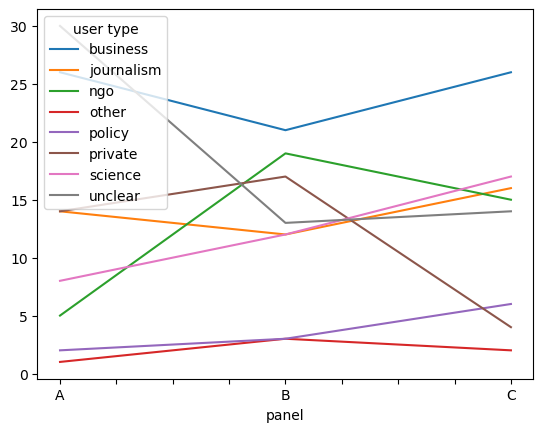

In [33]:
user_vc[['A', 'B', 'C']].transpose().plot()

In [6]:
user_all['second user type'].value_counts()

ngo         9
science     6
business    6
private     5
policy      1
other       1
Name: second user type, dtype: int64

In [7]:
user_all.groupby('user type')['n_cdr_tweets'].mean()

user type
business      53.917808
journalism    53.666667
ngo           43.358974
other         30.500000
policy        51.909091
private       14.542857
science       58.918919
unclear       26.052632
Name: n_cdr_tweets, dtype: float64

### Compare with Tim's annotations

In [8]:
user_all2 = []
for panel_name in ['A', 'B', 'C']:
    user_data = pd.read_excel('user-type-annotations/random_sample_users_panel{}_annotated_TR.xlsx'.format(panel_name), index_col=0)
    user_all2.append(user_data)

user_all2 = pd.concat(user_all2)

In [30]:
user_vc2 = user_all2.groupby('panel')['user type'].value_counts().unstack().transpose()
user_vc2['total_share'] = 100 * user_vc2.sum(axis=1) / user_vc2.sum().sum()
user_vc2

panel,A,B,C,total_share
user type,,,,
business,19,14,13,15.333333
journalism,7,7,12,8.666667
ngo,6,14,14,11.333333
other,6,3,4,4.333333
policy,1,1,5,2.333333
private,32,32,28,30.666667
science,6,9,15,10.000000
unclear,23,20,9,17.333333


<AxesSubplot:xlabel='panel'>

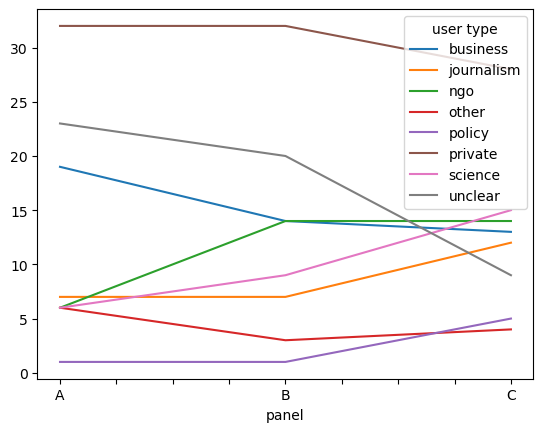

In [32]:
user_vc2[['A', 'B', 'C']].transpose().plot()

In [36]:
# compare total shares
pd.concat([user_vc['total_share'], user_vc2['total_share']], axis=1)

,total_share,total_share
user type,,
business,24.333333,15.333333
journalism,14.000000,8.666667
ngo,13.000000,11.333333
other,2.000000,4.333333
policy,3.666667,2.333333
private,11.666667,30.666667
science,12.333333,10.000000
unclear,19.000000,17.333333


<AxesSubplot:xlabel='Tim', ylabel='Finn'>

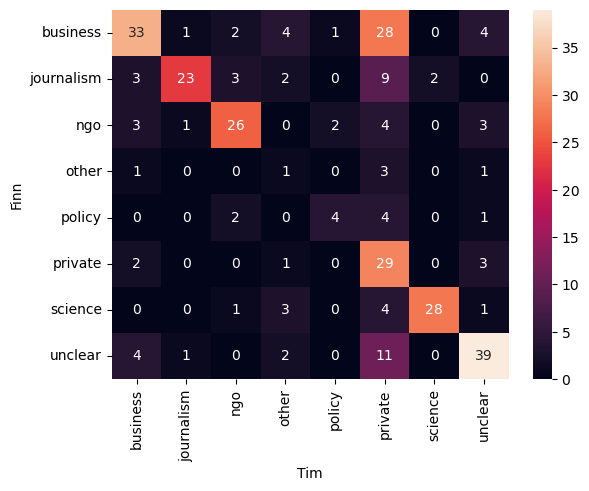

In [12]:
# compare one by one

comp = pd.merge(user_all, user_all2[['twitter_author_id', 'user type', 'second user type', 'note']], on='twitter_author_id')

confusion_matrix = pd.crosstab(comp['user type_x'], comp['user type_y'], rownames=['Finn'], colnames=['Tim'])

sn.heatmap(confusion_matrix, annot=True)
#plt.savefig('user-type-annotations/annotation_comparison_panelABC_FMH_TR.png', bbox_inches='tight')

In [13]:
comp['match on first'] = 0
comp['match on second'] = 0

In [14]:
comp.loc[comp['user type_x'] == comp['user type_y'], 'match on first'] = 1
comp['match on first'].sum()

183

In [15]:
comp.loc[(comp['user type_x'] == comp['user type_y']) |
         (comp['second user type_x'] == comp['user type_y']) |
         (comp['second user type_x'] == comp['second user type_y']) |
         (comp['user type_x'] == comp['second user type_y'])
         , 'match on second'] = 1
comp['match on second'].sum()

215

In [16]:
comp[comp['match on second'] == 0]

,twitter_author_id,name,username,user_location,verified,description,n_tweets,n_cdr_tweets,panel,user type_x,second user type_x,note_x,user type_y,second user type_y,note_y,match on first,match on second
13,720013724115861504,William Casey - Casey Beef LLC,Caseyag1,"St. Paul, KS",0,"It isn’t always being fast, or even accurate, ...",15290,1,A,business,NaN,NaN,unclear,NaN,NaN,0,0
15,16877302,Dan Pontarlier,danpontarlier,"Paris, France",0,I’m here to vent & clapback in 7 languages 🌬 •...,64752,2,A,journalism,NaN,NaN,private,NaN,NaN,0,0
16,2975823401,NaN,simsa0,NaN,0,"I am a dishwasher, cleaner, lavatory attendant...",7995,2,A,unclear,NaN,NaN,private,NaN,NaN,0,0
20,144437348,Nikhil Bose,NikzB,India,0,Bringing back the permanence to agriculture in...,1216,1,A,private,NaN,NaN,unclear,NaN,NaN,0,0
23,1117113255581949957,Deirdre Kincaid,DeirdreKincai15,NaN,0,"Actor, egghead and knitter",35,1,A,private,NaN,NaN,other,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,24233902,National Forest Fdn.,NationalForests,"Missoula, MT",1,We work with the U.S. Forest Service and thous...,33741,66,C,policy,NaN,NaN,ngo,NaN,NaN,0,0
296,260181868,Natasha,GAPSyndrome,UK,0,Gut and Psychology Syndrome (GAPS) - Natural t...,17992,66,C,unclear,NaN,NaN,other,NaN,NaN,0,0
297,571748492,Ronald Chanthunya,RonaldChanthuny,Malawi,0,"Executive Director, Philadephia Foundation Mal...",369,57,C,ngo,NaN,NaN,private,NaN,NaN,0,0
298,181912222,Leo Hickman,LeoHickman,NaN,1,Director/editor of @CarbonBrief. Served 16 yea...,58759,83,C,journalism,NaN,NaN,science,NaN,NaN,0,0


In [23]:
# export comparison table
comp_exp = comp.copy()
comp_exp['twitter_author_id'] = comp_exp['twitter_author_id'].astype(int)
comp_exp.to_excel('user-type-annotations/random_sample_users_panelABC_comparison_TR_FMH.xlsx')

In [19]:
# agreement on the first user type

from sklearn import metrics

metrics.cohen_kappa_score(comp['user type_x'], comp['user type_y'])

0.5428199283620971

In [20]:
# calculate Cohens kappa with
# randhäufigkeiten

hi = comp['user type_x'].value_counts().sort_index()
hj = comp['user type_y'].value_counts().sort_index()
pc = 1 / len(comp)**2 * (hi * hj).sum()

In [21]:
# test formula for first user type

p0 = comp['match on first'].sum() / len(comp)

(p0 - pc) / (1 - pc)

0.542819928362097

In [22]:
# also on the second

p0 = comp['match on second'].sum() / len(comp)

(p0 - pc) / (1 - pc)

0.6678606317160534

## after resolving disagreements

In [49]:
res = pd.read_excel('user-type-annotations/random_sample_users_panelABC_comparison_TR_FMH_resolved.xlsx', index_col=0)

res['resolved_complete'] = res['resolved']
res['resolved_complete'] = res['resolved_complete'].fillna(res['user type_x'])

In [53]:
vc_res = res.groupby('panel')['resolved_complete'].value_counts().unstack().transpose().fillna(0)
vc_res['total_share'] = 100 * vc_res.sum(axis=1) / vc_res.sum().sum()
vc_res

panel,A,B,C,total_share
resolved_complete,,,,
business,12.0,11.0,10.0,11.000000
business people,14.0,11.0,12.0,12.333333
journalism,11.0,14.0,15.0,13.333333
ngo,6.0,16.0,18.0,13.333333
other,2.0,2.0,0.0,1.333333
policy,3.0,4.0,4.0,3.666667
private,20.0,17.0,13.0,16.666667
science,8.0,10.0,15.0,11.000000
unclear,24.0,15.0,13.0,17.333333


<AxesSubplot:xlabel='panel'>

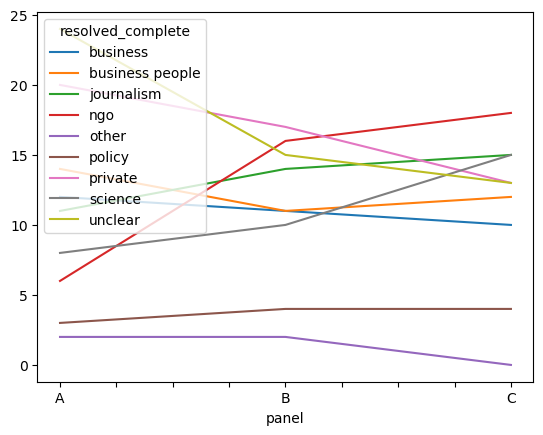

In [54]:
vc_res[['A', 'B', 'C']].transpose().plot()